In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("data")

In [4]:
df.describe()

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics
count,3027,3027,3019,3003,2906,3027
unique,800,2810,1688,619,772,2928
top,Bilal Saeed,Naina,Arijit Singh,Pritam,Kumaar,Haan...\nBillori nigaahon se kare hai sau isha...
freq,15,7,120,200,217,3


In [5]:
df.head()

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\nKarun mann ki\nBab..."
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\nMorey lahu ka rang ...
2,Laal Kaptaan,Red Red Najariya,Shreya Ghoshal,Samira Koppikar,Saurabh Jain,"Badnaam shehar, badnaam gully\nIsme har raat h..."
3,Laal Kaptaan,Kaal Kaal,"Brijesh Shandilya, Dino James",Samira Koppikar,Saurabh Jain,"Kaal kaal, kaal kaal, jo sapaat chal raha\nWo ..."
4,Laal Kaptaan,Taandav,"Kailash Kher, Brijesh Shandilya",Samira Koppikar,Puneet Sharma,Shor hai andher mein\nJo dher murda pedon ka\n...


In [6]:
[x.lower() for x in list(df.songLyrics)[0].split("\n")]

['sun, main hoon thoda sanki',
 'karun mann ki',
 'baby gaana lagade thoda funky',
 'nahi mann ki',
 'nahi dhan ki',
 'ye baat hai tere tann ki',
 '',
 'paagal ho jaaun jab tu ho rubaru',
 'na lamba ocha gora chitta',
 'phir bhi dil mein tu',
 'ishq ne tere kiya hai bekaboo',
 'jaisa hai waisa hi pasand mujhko tu jaanu',
 '',
 'i just wanna feel your body',
 '(saanu kare ishaare)',
 'touch my body',
 "don't be shy my honey",
 '(saanu kare ishaare)',
 '',
 'i wanna feel your body',
 '(saanu kare ishaare)',
 'touch my body',
 "don't be shy my honey",
 '(saanu kare ishaare)',
 'touch my body',
 'fly my honey',
 "don't be shy my honey",
 'befikar fly my honey',
 "don't be shy my honey",
 '',
 'sun, main hoon thoda sanki',
 'karun mann ki',
 'baby gaana lagade thoda funky',
 'nahi mann ki',
 'nahi dhan ki',
 'ye baat hai tere tann ki...',
 '',
 'kuch bhi bole bina',
 'aankhon se tu baat kare',
 'ye shaitani jaan bujhke mere saath kare',
 'tujhko dekhe bina dil mera ab kahin lage nahi',
 'te

In [7]:
list(df.songLyrics)[1].split("\n")

['Morey.. lahu ka rang kara',
 'Morey lahu ka rang kara',
 'Morey.. lahu ka rang kara',
 'Morey lahu ka rang kara',
 '',
 'Kaare badarwa manwa mein ghoome',
 'Kaare bhujanga sapno mein jhoome',
 'Ghole.. zehar ki ye dhaara',
 'Morey lahu ka rang kara',
 'Morey.. lahu ka rang kara',
 'Lahu ka rang kaara...',
 '',
 'Katit kaadank kapat kalank',
 'Maathe mandha koi shraap hai jeevan',
 'Raja ho ya rank',
 'Kabila ya jhund',
 'Har praan ka hi lakshya hai maran',
 '',
 'Jeetna hai jo ye rann',
 'Kar bairi ka daman',
 'Warna mile na chhutkaara',
 '',
 'Morey.. lahu ka rang kara',
 'Morey lahu ka rang kara',
 'Morey.. lahu ka rang kara',
 'Morey lahu ka rang kaara...',
 'Lahu ka... kaara...',
 'Aa...']

In [8]:
'AbC fdalsfJSD'.lower()

'abc fdalsfjsd'

In [9]:
import re

line = 'upar se raat hoti ja rahi hai\'s naughty naughty naughty...'
line = "(saanu kare ishaare)"
# remove the "" and single alphabets in these
re.split(r'[;,\s...\n()\']\s*',line)

['', 'saanu', 'kare', 'ishaare', '']

In [10]:
import re

dataset = ''
countOfWords = 0
uniqueWords = {}
for song in list(df.songLyrics):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        dataset+=' '+word
        countOfWords+=1
        uniqueWords[word] = 1

    

In [53]:
dataset[:1000]


' sun main hoon thoda sanki karun mann ki baby gaana lagade thoda funky nahi mann ki nahi dhan ki ye baat hai tere tann ki paagal ho jaaun jab tu ho rubaru na lamba ocha gora chitta phir bhi dil mein tu ishq ne tere kiya hai bekaboo jaisa hai waisa hi pasand mujhko tu jaanu i just wanna feel your body  saanu kare ishaare touch my body don t be shy my honey  saanu kare ishaare i wanna feel your body  saanu kare ishaare touch my body don t be shy my honey  saanu kare ishaare touch my body fly my honey don t be shy my honey befikar fly my honey don t be shy my honey sun main hoon thoda sanki karun mann ki baby gaana lagade thoda funky nahi mann ki nahi dhan ki ye baat hai tere tann ki   kuch bhi bole bina aankhon se tu baat kare ye shaitani jaan bujhke mere saath kare tujhko dekhe bina dil mera ab kahin lage nahi tere husn pe aankhein sek sek kar thake nahi upar se raat hoti ja rahi hai naughty naughty naughty   don t be shy my honey   i wanna feel your body  saanu kare ishaare touch my b

In [12]:
countOfWords

550499

In [13]:
len(uniqueWords.keys())

33164

In [15]:
import os
import nltk
import gensim
from gensim import corpora, models, similarities

In [16]:
listDataset = list(dataset)

In [17]:
model = gensim.models.Word2Vec(dataset, min_count = 1, size = 32)


In [18]:
from gensim.test.utils import common_texts

In [19]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [20]:
import re

dataset_gensim = []
countOfWords = 0
uniqueWords = {}
for song in list(df.songLyrics):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    wordList = []
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        wordList.append(word)
        countOfWords+=1
        uniqueWords[word] = 1
    dataset_gensim.append(wordList)


In [21]:
model = gensim.models.Word2Vec(dataset_gensim, min_count = 1, size = 64)


In [22]:
model.most_similar("papa")

C:\Users\ashis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('kick', 0.9868531227111816),
 ('chaudhary', 0.9865725040435791),
 ('leader', 0.9858062267303467),
 ('bajaye', 0.9856977462768555),
 ('doodh', 0.9850409030914307),
 ('item', 0.9846519231796265),
 ('baalon', 0.9844696521759033),
 ('bandi', 0.984286904335022),
 ('ganji', 0.9839993715286255),
 ('daam', 0.9839252233505249)]

In [40]:
model2 = gensim.models.Word2Vec(dataset_gensim, size=100, window=50, min_count=1)


In [41]:
model2.most_similar("ladki")

C:\Users\ashis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('tikhi', 0.8861581087112427),
 ('bolti', 0.8781159520149231),
 ('pagli', 0.8471066355705261),
 ('mastani', 0.8362908959388733),
 ('bhadki', 0.8353980183601379),
 ('nakhrezi', 0.8326283693313599),
 ('[girl', 0.8313601016998291),
 ('karti', 0.8194378018379211),
 ('filmon', 0.8185829520225525),
 ('tezi', 0.8085873126983643)]

In [43]:
model2.most_similar("papa")

C:\Users\ashis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('bajaye', 0.8748748302459717),
 ('hai”', 0.8666554093360901),
 ('party', 0.8655844926834106),
 ('“idiot', 0.8641202449798584),
 ('sangi-saathi', 0.8578517436981201),
 ('principle', 0.8531455397605896),
 ('raid', 0.8523707389831543),
 ('bam', 0.8388422727584839),
 ('utthaao', 0.8383796811103821),
 ('karwaao', 0.8360882997512817)]

In [46]:
model3 = gensim.models.FastText(size=4, window=10, min_count=1, sentences=dataset_gensim, iter=10)

In [47]:
model3.most_similar("daru")

C:\Users\ashis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('chara', 0.9991294145584106),
 ('bi', 0.9980666637420654),
 ('wakho', 0.9976942539215088),
 ('durr', 0.997327983379364),
 ('ae…<br/><br/>paas', 0.9970935583114624),
 ('mukhatib', 0.996383786201477),
 ('saabit', 0.9959100484848022),
 ('bhaanda', 0.9953662157058716),
 ('junaid', 0.9948311448097229),
 ('parvardigara…', 0.9946730136871338)]

In [48]:
# model4 = gensim.models.wrappers.Wordrank.train(dataset_gensim, corpus_file='text8', out_name='wr_model') 


## Interpretting style of the songs

In [51]:
try:
    import zopfli
except:
    !pip install zopfli
from zopfli.zlib import compress
from zlib import decompress
import sys
import os
import pandas as pd
import seaborn as sns
import numpy as np
import re


In [49]:
def getCompressionFromSong(song):
    compress_size = sys.getsizeof(compress(song))
    uncomressed_song_size = sys.getsizeof(song.encode())
    compression = (100-(compress_size/uncomressed_song_size)*100)
    return compression


In [66]:
compressions = []
songs = []

breaker = 0
for song in list(df.songLyrics):
    breaker+=1
    if breaker == 301:
        break
        
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    processedSong = ''
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    
    compressions.append(getCompressionFromSong(processedSong))
#     songs.append(song)
    

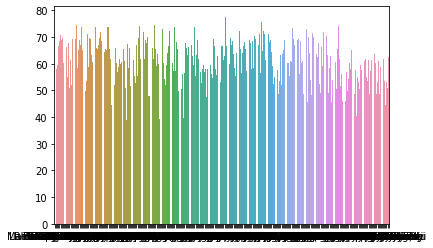

In [67]:
songs = list(df.songName)[:300]
# compressions = compressions

sns.barplot(songs, np.array(compressions))

## Analysing Compresion in 100 songs

In [75]:
def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    return processedSong
    
compressions = []
songs = []
breakAt = 100
breaker = 0
for song in list(df.songLyrics):
    if breaker == breakAt:
        break
    breaker+=1
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
    processedSong = ''
    for word in listOfWords:
#         if word ==  '' || word=='(' || word==')' || word =='\'':
#             pass
#         else:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    
    compressions.append(getCompressionFromSong(processedSong))
#     songs.append(song)
songs = list(df.songName)[:breakAt]
print("Average Compression is : ", sum(compressions)/len(compressions))
# compressions = compressions



Average Compression is :  62.87894870288409


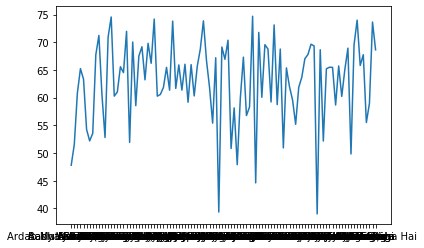

In [74]:
sns.lineplot(songs, np.array(compressions))

# Calculating the year wise compressions

In [76]:
df2 = pd.read_csv("moviesWithYears.csv")

In [86]:
averageCompressionYearWiseData = []
compressionList = []
styleAnalysis = []

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    return processedSong

for x in df2.years.unique():
    # get all songs with year == x
    yearLyrics = list(df2[df2.years == x].songLyrics)
    sumCompressions = int(0)
    countSongsInYear = len(yearLyrics)
    songIndex = 0 
    songNames = list(df2[df2.years == x].songName)
    for lyrics in yearLyrics:
        lyrics = songPreprocessing(lyrics)
        compression = getCompressionFromSong(lyrics)
        sumCompressions+=compression
        print("Compression for songName ",songNames[songIndex], " is : ")
        print(compression)
        compressionList.append([x,songNames[songIndex], compression])
        songIndex+=1
    
    averageCompression = sumCompressions/countSongsInYear
    print("-------- Average compression for year ", x, " is : ", averageCompression)
    print("")
    print("")
    print("")
    print("")
    averageCompressionYearWiseData .append([int(x),averageCompression])

Compression for songName  Don’t Be Shy  is : 
67.49256689791873
Compression for songName  Lahu Ka Rang Kara  is : 
58.144329896907216
Compression for songName  Red Red Najariya  is : 
59.56284153005464
Compression for songName  Kaal Kaal  is : 
66.69557675628795
Compression for songName  Taandav  is : 
68.63849765258216
Compression for songName  Crazy Lagdi  is : 
70.93821510297482
Compression for songName  Outfit  is : 
68.75739644970415
Compression for songName  Twinkle Twinkle  is : 
69.54595791805095
Compression for songName  Chand Nikla  is : 
60.48053024026512
Compression for songName  Vibe Hai  is : 
67.74519716885743
Compression for songName  Gandhi Money  is : 
66.19789050728278
Compression for songName  Remand  is : 
55.18062723302898
Compression for songName  Chal Bombay  is : 
67.7320221266134
Compression for songName  Kohinoor  is : 
50.811047786058744
Compression for songName  Ishq Maine Paaya  is : 
61.35338345864662
Compression for songName  Tanha Mera Pyaar  is : 
52.1

Compression for songName  Niyam Ho  is : 
56.891025641025635
Compression for songName  Question Mark  is : 
52.783109404990405
Compression for songName  Basanti No Dance  is : 
58.18181818181819
Compression for songName  Paisa  is : 
59.45355191256831
Compression for songName  Jugraafiya  is : 
56.94564279551337
Compression for songName  Maila Maila  is : 
57.97872340425532
Compression for songName  Angrezi Luv Shuv  is : 
47.72277227722772
Compression for songName  Madaari  is : 
57.98941798941799
Compression for songName  Intezari  is : 
62.61363636363637
Compression for songName  Naina Yeh  is : 
59.60061443932412
Compression for songName  Shuru Karein Kya  is : 
56.33047210300429
Compression for songName  Baarish  is : 
54.82142857142857
Compression for songName  Gehra Halka  is : 
69.40581542351454
Compression for songName  Hashar Se Pehle  is : 
66.71122994652407
Compression for songName  Manmohini  is : 
58.05805805805806
Compression for songName  Hume Tumse Pyaar Kitna (Title S

Compression for songName  Dhadkan  is : 
51.851851851851855
Compression for songName  Finito  is : 
56.161395856052344
Compression for songName  Jab Se Mera Dil  is : 
46.0559796437659
Compression for songName  Kokh Ke Rath Mein  is : 
40.96045197740112
Compression for songName  Gali Gali  is : 
46.080760095011875
Compression for songName  Salaam Rocky Bhai (Hindi)  is : 
56.763925729442974
Compression for songName  Bandeya Rey Bandeya  is : 
49.72776769509982
Compression for songName  Mera Wala Dance  is : 
54.255319148936174
Compression for songName  Aala Re Aala  is : 
60.19230769230769
Compression for songName  Tere Bin  is : 
58.01033591731266
Compression for songName  Aankh Marey  is : 
65.08795669824087
Compression for songName  Tu Hi Re  is : 
67.36493936052922
Compression for songName  Tanha Hua  is : 
48.64253393665159
Compression for songName  Ann Bann  is : 
57.61904761904762
Compression for songName  Heer Badnaam  is : 
40.59701492537313
Compression for songName  Husn Parc

Compression for songName  Tera Fitoor  is : 
55.452127659574465
Compression for songName  Badan Pe Sitare  is : 
53.391684901531725
Compression for songName  Fu Bai Fu  is : 
51.84049079754601
Compression for songName  Tere Jaisa Tu Hai  is : 
59.89583333333333
Compression for songName  Achche Din  is : 
58.48056537102473
Compression for songName  Halka Halka  is : 
67.2153635116598
Compression for songName  Mohabbat  is : 
45.27777777777777
Compression for songName  Chota Sa Fasana  is : 
41.90981432360743
Compression for songName  Ghar Layenge Gold  is : 
68.69109947643979
Compression for songName  Chad Gayi Hai  is : 
61.64574616457462
Compression for songName  Naino Ne Baandhi  is : 
52.39043824701195
Compression for songName  Party Tera Bhai Dega  is : 
52.39766081871345
Compression for songName  One Sidedd  is : 
52.71828665568369
Compression for songName  Tere Jaisa  is : 
54.16666666666667
Compression for songName  Tajdar e Haram  is : 
54.88721804511278
Compression for songNam

Compression for songName  Sanu Ek Pal Chain  is : 
63.059701492537314
Compression for songName  Kache Pakke Supne  is : 
65.26429341963322
Compression for songName  Na Kasoor  is : 
45.26854219948849
Compression for songName  Talli Tonight  is : 
42.391304347826086
Compression for songName  Hatt Ja Tau  is : 
55.894308943089435
Compression for songName  Mind Blowing  is : 
58.82352941176471
Compression for songName  Shehzada  is : 
63.94948335246843
Compression for songName  So Simple  is : 
53.51851851851852
Compression for songName  Pehla Nasha Once Again  is : 
52.86624203821656
Compression for songName  Na Tum Rahe Tum  is : 
42.88747346072187
Compression for songName  Naam Hai Mera  is : 
54.25219941348974
Compression for songName  Badnaamiyan  is : 
65.20376175548589
Compression for songName  Mohabbat Nasha Hai  is : 
47.52066115702479
Compression for songName  Tum Mere Ho  is : 
49.68017057569296
Compression for songName  Boond Boond  is : 
52.030947775628626
Compression for son

Compression for songName  Yaara  is : 
56.60377358490566
Compression for songName  Vadde Velly  is : 
51.37614678899082
Compression for songName  Kankad  is : 
55.02471169686985
Compression for songName  Laddoo  is : 
55.02577319587629
Compression for songName  Kanha Unplugged  is : 
55.869565217391305
Compression for songName  Kanha  is : 
47.93187347931873
Compression for songName  Rocket Saiyyan  is : 
59.5482546201232
Compression for songName  Teen Kabootar  is : 
61.143410852713174
Compression for songName  Rangdaari  is : 
59.46843853820598
Compression for songName  Meer-E-Kaarwan  is : 
59.55056179775281
Compression for songName  Kaavaan Kaavaan  is : 
57.05967976710335
Compression for songName  Barfani  is : 
56.847133757961785
Compression for songName  Badass Babuaa  is : 
61.52597402597403
Compression for songName  Nazm Nazm (Feat. Ayushmann Khurrana)  is : 
54.123711340206185
Compression for songName  Bairaagi  is : 
55.985915492957744
Compression for songName  Twist Kamariy

Compression for songName  Teri Yaadon Mein  is : 
54.72370766488414
Compression for songName  Jaanu  is : 
55.330490405117274
Compression for songName  Tera Hoke Rahoon  is : 
52.36051502145923
Compression for songName  Sachin Sachin  is : 
47.44027303754266
Compression for songName  Hind Mere Jind  is : 
62.2568093385214
Compression for songName  Darasal  is : 
46.17834394904459
Compression for songName  Main Tera Boyfriend  is : 
66.87158469945355
Compression for songName  Lambiyaan Si Judaiyaan  is : 
52.02205882352941
Compression for songName  Sadda Move  is : 
61.71232876712329
Compression for songName  Raabta (Title Song)  is : 
57.44047619047619
Compression for songName  Ik Vaari Aa  is : 
46.26168224299065
Compression for songName  Gedha  is : 
46.864686468646866
Compression for songName  Sargi  is : 
53.94088669950739
Compression for songName  Crack Jatt  is : 
53.304597701149426
Compression for songName  Ek Jindari  is : 
49.23076923076923
Compression for songName  Oh ho ho h

Compression for songName  Jolly Good Fellow  is : 
60.56149732620321
Compression for songName  O Re Rangreza (Qawaali)  is : 
54.13642960812772
Compression for songName  Bawara Mann  is : 
43.76470588235294
Compression for songName  Go Pagal  is : 
53.674121405750796
-------- Average compression for year  2017  is :  55.028357023622895




Compression for songName  Aadat  is : 
46.16788321167883
Compression for songName  Ni Mainu  is : 
46.42857142857143
Compression for songName  Halka Halka  is : 
64.20824295010846
Compression for songName  Ghammar Ghammar  is : 
60.92592592592593
Compression for songName  Saanson Ke  is : 
50.10752688172043
Compression for songName  Enu Naam Che Raees  is : 
54.05904059040591
Compression for songName  Dhingana  is : 
50.44052863436123
Compression for songName  Udi Udi Jaye  is : 
55.04322766570605
Compression for songName  Zaalima  is : 
51.54798761609907
Compression for songName  Laila Main Laila  is : 
54.98220640569395
Compression for songName  Sa

Compression for songName  Naamkarann (Title Track)  is : 
67.22350230414747
Compression for songName  Aa Leke Chalun Tujhko (Lori Song)  is : 
67.66220391349125
Compression for songName  Aaj Jaane Ki Zid Na Karo  is : 
63.492063492063494
Compression for songName  Fiza Ye Khiza  is : 
48.12499999999999
Compression for songName  Raat Saturday Ki Hai  is : 
63.333333333333336
Compression for songName  Happy Happy  is : 
65.85365853658536
Compression for songName  Chalte Chalte  is : 
59.09980430528376
Compression for songName  Tutak Tutak Tutiya (Title Track)  is : 
60.51587301587302
Compression for songName  Rail Gaddi  is : 
63.521288837744535
Compression for songName  Jeet Ka Halla Anthem  is : 
64.89945155393053
Compression for songName  Sanam Mere Sanam  is : 
52.69978401727862
Compression for songName  Ishq Abhi Bhi  is : 
69.56904133685137
Compression for songName  Tu Hai  is : 
48.459383753501406
Compression for songName  Ab Alvida  is : 
59.012016021361816
Compression for songNam

Compression for songName  Khara Khara  is : 
56.9204152249135
Compression for songName  Mile Ho Tum  is : 
57.03422053231939
Compression for songName  Paani Ka Raasta  is : 
52.74725274725275
Compression for songName  Qatl-E-Aam (Unplugged)  is : 
65.17857142857143
Compression for songName  Ishqa  is : 
62.74900398406375
Compression for songName  Jaaneman Aah  is : 
53.67647058823529
Compression for songName  Toh Dishoom  is : 
54.24281984334204
Compression for songName  Sau Tarah Ke  is : 
62.11180124223603
Compression for songName  Mere Peeche Hindustan  is : 
66.87598116169545
Compression for songName  Rang Reza (Male)  is : 
54.493307839388144
Compression for songName  Rang Reza (Female)  is : 
53.690036900369
Compression for songName  Pyaar De  is : 
58.17901234567901
Compression for songName  Mar Gaye  is : 
65.51126516464473
Compression for songName  Main Adhoora  is : 
44.505494505494504
Compression for songName  Hug Me  is : 
64.20824295010846
Compression for songName  Tere Bi

Compression for songName  Jabra Fan  is : 
64.21825813221406
Compression for songName  Kab Aaoge  is : 
54.88454706927176
Compression for songName  Titli  is : 
62.66447368421053
Compression for songName  Manwa Behrupiya  is : 
60.285714285714285
Compression for songName  Gaddi  is : 
55.28317836010144
Compression for songName  Woh Chori  is : 
64.07142857142858
Compression for songName  Mundeya Di Maut  is : 
51.491819056785374
Compression for songName  Lonely  is : 
55.42521994134898
Compression for songName  Sare Karo Dab  is : 
53.10660562459123
Compression for songName  Jean Teri  is : 
56.163021868787276
Compression for songName  Tere Wargi Nai Ae  is : 
63.322884012539184
Compression for songName  Instagram Love  is : 
51.674107142857146
Compression for songName  Do Hazaar Solo  is : 
50.23310023310023
Compression for songName  Marjawan  is : 
63.609022556390975
Compression for songName  Yaar Di Gali  is : 
71.15613825983314
Compression for songName  Wakho Wakh  is : 
63.4191176

Compression for songName  Murli Ki Taanon Si  is : 
16.21621621621621
Compression for songName  Bachpan Kahan  is : 
59.52848722986248
Compression for songName  Tod Tadaiyya  is : 
66.88654353562005
Compression for songName  Halo Re  is : 
61.04651162790697
Compression for songName  Aaj Unse Milna Hai  is : 
60.50870147255689
Compression for songName  Prem Leela  is : 
54.67914438502674
Compression for songName  Tere Bin Nahi Rehna  is : 
49.056603773584904
Compression for songName  Young Young Lounde Kharab Kar Gayee  is : 
50.96852300242131
Compression for songName  Tadpaave Ishq Mein  is : 
49.12891986062717
Compression for songName  Tu Dua Hai Dua  is : 
38.4393063583815
Compression for songName  Jinde Meriye  is : 
62.5
Compression for songName  Sathia (Duet Version)  is : 
44.26229508196722
Compression for songName  Fitoori  is : 
65.32467532467533
Compression for songName  Malhari  is : 
65.72769953051643
Compression for songName  Aaj Ibaadat  is : 
56.539235412474845
Compressio

Compression for songName  Vande Mataram  is : 
57.003891050583654
Compression for songName  Tattoo  is : 
63.65663322185061
Compression for songName  Naach Meri Jaan  is : 
57.389162561576356
Compression for songName  Happy Hour  is : 
52.9639175257732
Compression for songName  Hey Ganaraya  is : 
52.53239104829211
Compression for songName  If You Hold My Hand  is : 
61.83783783783784
Compression for songName  Happy B'day  is : 
70.10185739964051
Compression for songName  Chunar  is : 
67.55070202808112
Compression for songName  Sun Saathiya  is : 
53.678474114441414
Compression for songName  Bezubaan Phir Se  is : 
64.64891041162227
Compression for songName  Hai Koi  is : 
45.36423841059602
Compression for songName  Phir Bhi Yeh Zindagi  is : 
57.81637717121588
Compression for songName  Girls Like To Swing  is : 
73.20211960635882
Compression for songName  Pehli Baar  is : 
63.70143149284254
Compression for songName  Gallan Goodiyaan  is : 
64.46945337620579
Compression for songName  

Compression for songName  Badla Badla  is : 
62.23175965665236
Compression for songName  Judaai  is : 
55.22174535050072
Compression for songName  Jeena Jeena  is : 
66.8820678513732
Compression for songName  Jee Karda  is : 
67.03296703296704
Compression for songName  Piddly  is : 
67.54130223517978
Compression for songName  Madamiyan  is : 
61.29032258064516
Compression for songName  Main Nai Jaana Pardes  is : 
71.61835748792271
Compression for songName  Joganiyan  is : 
57.43944636678201
Compression for songName  Let’s Celebrate  is : 
66.76176890156918
Compression for songName  Radha Nachegi  is : 
48.33333333333333
Compression for songName  Superman  is : 
59.060402684563755
Compression for songName  Dil Ka Funda  is : 
58.88594164456234
Compression for songName  Selfiyaan  is : 
64.77079796264856
Compression for songName  Zid Title Song  is : 
55.136268343815516
Compression for songName  Mareez-e-Ishq  is : 
53.72093023255814
Compression for songName  Tu Zaroori  is : 
68.930817

Compression for songName  Hai Yehi Zindagi  is : 
52.12527964205817
Compression for songName  Yaar Naa Miley  is : 
62.01834862385321
Compression for songName  Tu Hi Tu  is : 
67.13091922005572
Compression for songName  Hangover  is : 
66.44664466446645
Compression for songName  Jumme Ki Raat  is : 
63.706563706563706
Compression for songName  Emotional Fool  is : 
69.06028368794327
Compression for songName  Daingad Daingad  is : 
66.04859335038364
Compression for songName  D Se Dance  is : 
51.92837465564738
Compression for songName  Lucky Tu Lucky Me  is : 
60.53082191780822
Compression for songName  Samjhawan  is : 
62.3921085080148
Compression for songName  Saturday Saturday  is : 
59.34379457917261
Compression for songName  Pink Lips  is : 
68.99365367180417
Compression for songName  Hai Dil Ye Mera  is : 
57.765667574931875
Compression for songName  Kabhi Aayine Pe Likha Tujhe  is : 
57.88643533123029
Compression for songName  Aaj Phir  is : 
54.33403805496829
Compression for son

Compression for songName  Soniye  is : 
54.60599334073252
Compression for songName  Mashooqana  is : 
54.274084124830395
-------- Average compression for year  2014  is :  59.2204324183794




Compression for songName  Tu Kuja  is : 
56.626506024096386
Compression for songName  Patakha Guddi (Male Version)  is : 
64.4191714053615
Compression for songName  Sooha Saaha  is : 
55.1051051051051
Compression for songName  Kahaan Hoon Main  is : 
57.04347826086957
Compression for songName  Maahi Ve  is : 
55.57184750733138
Compression for songName  Patakha Guddi  is : 
61.27622377622377
Compression for songName  Heera  is : 
59.4847775175644
Compression for songName  Wanna Mash Up  is : 
57.44466800804829
Compression for songName  Punjabi Wedding Song  is : 
62.36044657097289
Compression for songName  Zehnaseeb  is : 
60.49382716049383
Compression for songName  Ishq Bulaava  is : 
63.946587537091986
Compression for songName  Manchala  is : 
53.051643192488264
Compression for songName  Shake I

Compression for songName  Tere Mere Beech Mein  is : 
66.41860465116278
Compression for songName  Ek Ghadi  is : 
60.94946401225115
Compression for songName  Dhuaan  is : 
52.64270613107823
Compression for songName  Murshid Khele Holi  is : 
68.24946846208363
Compression for songName  Duma Dum  is : 
69.33514246947082
Compression for songName  Alvida  is : 
57.730496453900706
Compression for songName  Bismillah  is : 
58.70253164556962
Compression for songName  Chugliyaan  is : 
60.98707403055229
Compression for songName  Tu Hi Khwahish  is : 
54.826254826254825
Compression for songName  Tayyab Ali  is : 
59.61732124874119
Compression for songName  Ye Tune Kya Kiya  is : 
55.39033457249071
Compression for songName  Lungi Dance  is : 
58.24175824175824
Compression for songName  Ready Steady Po  is : 
59.124629080118694
Compression for songName  Kashmir Main Tu Kanyakumari  is : 
64.29699842022117
Compression for songName  Tera Rastaa Chhodoon Na  is : 
52.50431778929188
Compression for 

Compression for songName  Zindagi Ka Karobar  is : 
58.980582524271846
Compression for songName  Maula Tu Malik Hai  is : 
62.749445676274945
Compression for songName  Darmiyan  is : 
72.42990654205607
Compression for songName  Shubhaarambh  is : 
61.455847255369925
Compression for songName  Meethi Boliyan  is : 
61.65311653116532
Compression for songName  Manja  is : 
58.65209471766849
Compression for songName  Maria Pitache  is : 
51.851851851851855
Compression for songName  Dharpakad  is : 
47.16981132075472
Compression for songName  Kaun Mera  is : 
67.61421319796955
Compression for songName  Gore Mukhde Pe  is : 
61.94174757281554
Compression for songName  Mujh Mein Tu  is : 
60.49586776859504
Compression for songName  Tujh Sang Lagi  is : 
57.166666666666664
Compression for songName  Sadda Dil Vi Tu (Ga Ga Ga Ganpati)  is : 
63.14176245210728
Compression for songName  Man Basiyo Saanwariyo  is : 
53.72549019607843
Compression for songName  Chandu Ki Girl Friend  is : 
53.05623471

Compression for songName  Khwahishein  is : 
52.34657039711191
Compression for songName  Main Heroine Hoon  is : 
45.08816120906801
Compression for songName  Saaiyaan  is : 
57.800000000000004
Compression for songName  Halkat Jawani  is : 
58.662092624356774
Compression for songName  Table No.21 (Title Track)  is : 
62.75946275946276
Compression for songName  Mann Mera  is : 
62.33635448136959
Compression for songName  Aashiyan  is : 
63.42943854324734
Compression for songName  Phir Le Aya Dil  is : 
57.82178217821782
Compression for songName  Saawali Si Raat  is : 
54.12844036697248
Compression for songName  Kyon  is : 
57.82178217821782
Compression for songName  Main Kya Karoon  is : 
59.473684210526315
Compression for songName  Ala Barfi  is : 
65.02002670226969
Compression for songName  Khayalon Mein  is : 
60.66666666666667
Compression for songName  Kya Raaz Hai  is : 
58.58310626702997
Compression for songName  Oh My Love  is : 
64.43298969072166
Compression for songName  Rafta R

Compression for songName  Jannatein Kahan  is : 
57.158469945355186
Compression for songName  Rab Ka Shukrana  is : 
62.55088195386703
Compression for songName  Tujhe Sochta Hoon  is : 
63.91891891891892
Compression for songName  Tera Deedar Hua  is : 
65.12820512820514
Compression for songName  Tu Hi Mera  is : 
50.233281493001556
Compression for songName  Kangna Tera Ni  is : 
69.78260869565217
Compression for songName  Audi (Tenu Tak De)  is : 
66.39411283728536
Compression for songName  Kabootar  is : 
54.981549815498155
Compression for songName  Mann Jaage  is : 
54.35294117647059
Compression for songName  Kick Lag Gayi  is : 
60.24096385542169
Compression for songName  Kaun Kenda  is : 
50.54945054945055
Compression for songName  Bittoo Sabki Lega  is : 
61.3013698630137
Compression for songName  Kaala Rey  is : 
65.06364922206507
Compression for songName  Chhi Chha Ledar  is : 
63.72031662269129
Compression for songName  Jiya Ho Bihar Ke Lala  is : 
61.72381835032437
Compression

Compression for songName  Gangland in Motherland  is : 
65.85094549499445
Compression for songName  Marham  is : 
50.49701789264414
Compression for songName  Shuffle Track 2.0  is : 
41.84873949579831
Compression for songName  Tip Tip  is : 
46.62480376766091
Compression for songName  Gum Hoon  is : 
57.36842105263158
Compression for songName  Chamma Chamma  is : 
58.83084577114428
Compression for songName  Tu Na Jaane  is : 
47.58620689655172
Compression for songName  Yeh Kya Hua  is : 
33.0827067669173
Compression for songName  Fikkiyan  is : 
53.93586005830904
Compression for songName  Tujhse Door Jo Hota Hun  is : 
65.389369592089
Compression for songName  Kaash  is : 
50.0
Compression for songName  Ready To Move  is : 
55.36159600997506
Compression for songName  Khainch Le Qashh  is : 
52.552926525529266
Compression for songName  Ishq Teri Zaat Hai Kya  is : 
63.960396039603964
Compression for songName  Kash Fir Se  is : 
64.38529784537388
-------- Average compression for year  20

Compression for songName  Rab Rakha  is : 
50.14005602240896
Compression for songName  Bekabu  is : 
57.37704918032787
Compression for songName  Muskura Do Ek Baar  is : 
32.27513227513228
Compression for songName  Kaari Kaari  is : 
60.62767475035663
Compression for songName  Piya Kesariyo  is : 
54.049586776859506
Compression for songName  Thank You Mr DJ  is : 
55.64102564102564
Compression for songName  Hey Na Na  is : 
56.0
Compression for songName  Music Band Na Karo  is : 
57.744360902255636
Compression for songName  Ki Banu Duniya Da  is : 
67.02470461868958
Compression for songName  Allah Veh  is : 
56.902848794740684
Compression for songName  Bihu Naam Pak Pak  is : 
75.78369905956113
Compression for songName  Gal Sun Soniye  is : 
53.925925925925924
Compression for songName  Ne Aaja Veh Punjabi Song  is : 
66.96914700544465
Compression for songName  Shera Di Kaum  is : 
62.37942122186495
Compression for songName  The Meeting Place  is : 
10.091743119266056
Compression for so

Compression for songName  Aye Khuda  is : 
57.56490599820949
Compression for songName  Aa Zara  is : 
58.56423173803527
Compression for songName  Hale Dil  is : 
52.897473997028236
Compression for songName  Chammak Challo (with Tamil & Translation to English)  is : 
60.51282051282051
Compression for songName  Criminal  is : 
67.73533424283765
Compression for songName  Jiya Mora Ghabraye  is : 
72.91666666666667
Compression for songName  Raftaarein  is : 
58.97435897435898
Compression for songName  Right By Your Side  is : 
79.89276139410188
Compression for songName  Bhare Naina  is : 
64.25992779783394
Compression for songName  Dildara ( Stand by Me ) Song  is : 
65.93406593406593
Compression for songName  Chammak Challo  is : 
58.41371918542336
Compression for songName  Janasheen  is : 
57.476635514018696
Compression for songName  Jaane Kyun  is : 
48.275862068965516
Compression for songName  Dil Ka Achaar Dalogi Item Song  is : 
69.5219123505976
Compression for songName  Shalu Ke Thu

Compression for songName  Te Amo  is : 
59.930313588850176
Compression for songName  Mit Jaaye Gham  is : 
64.61538461538461
Compression for songName  Ya Maula  is : 
59.41114616193481
Compression for songName  Mai Jabse Tujhse Mila (Neend Nadarad)  is : 
77.47252747252747
Compression for songName  Full Volume  is : 
66.34146341463415
Compression for songName  Pyaar Mein  is : 
60.56056056056056
Compression for songName  My Heart Is Beating  is : 
67.01195219123505
Compression for songName  Pyar Do Pyar Lo  is : 
55.745341614906835
Compression for songName  Mehki Mehki  is : 
58.98876404494382
Compression for songName  Maine Yeh Kab Socha Tha  is : 
56.16438356164384
Compression for songName  Le Ja Tu Mujhe  is : 
61.93693693693694
Compression for songName  Jee Dhoondta Hai  is : 
62.254901960784316
Compression for songName  Daastan-e-Ishq  is : 
61.7157490396927
Compression for songName  Jaan-e-Man  is : 
56.88073394495412
Compression for songName  Yar Daddi Ishq  is : 
69.36067551266

In [88]:
import numpy as np
yearly_compression = np.array(averageCompressionYearWiseData)

In [90]:
tenYearCompressions = [yearlyCompression[:10]]
yearly_compression[:,1]

array([62.38807506, 57.35852178, 55.02835702, 56.60902426, 58.00677289,
       59.22043242, 58.84692158, 58.78002748, 58.59414974, 58.74847005,
       63.05732484])

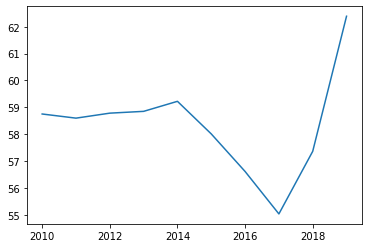

In [96]:
sns.lineplot(yearly_compression[:10][:,0], yearly_compression[:10][:,1])

In [101]:
len(df2.songLyricist.unique())

773

In [102]:
df2.head(2)

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics,years
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\nKarun mann ki\nBab...",2019
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\nMorey lahu ka rang ...,2019


# Calculating Artist Wise Compression


In [103]:
averageCompressionLyricistWiseData = []
compressionList_Lyricist = []
styleAnalysis_Lyricist = []

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=word
    return processedSong

for x in df2.songLyricist.unique():
    # get all songs with year == x
    lyricistSongsLyrics = list(df2[df2.songLyricist == x].songLyrics)
    sumCompressions = int(0)
    countSongsInYear = len(lyricistSongsLyrics)
    songIndex = 0 
    songNames = list(df2[df2.songLyricist == x].songName)
    for lyrics in lyricistSongsLyrics:
        lyrics = songPreprocessing(lyrics)
        compression = getCompressionFromSong(lyrics)
        sumCompressions+=compression
        print("Compression for songName ",songNames[songIndex], " is : ")
        print(compression)
        compressionList_Lyricist.append([x, songNames[songIndex], compression])
        songIndex+=1
    
    averageCompression = sumCompressions/countSongsInYear
    print("-------- Average compression for Lyricist ", x, " is : ", averageCompression)
    print("")
    print("")
    print("")
    print("")
    averageCompressionLyricistWiseData.append([x,averageCompression])

Compression for songName  Don’t Be Shy  is : 
67.49256689791873
-------- Average compression for Lyricist  Mellow D, Badshah  is :  67.49256689791873




Compression for songName  Lahu Ka Rang Kara  is : 
58.144329896907216
-------- Average compression for Lyricist  Sahib  is :  58.144329896907216




Compression for songName  Red Red Najariya  is : 
59.56284153005464
Compression for songName  Kaal Kaal  is : 
66.69557675628795
-------- Average compression for Lyricist  Saurabh Jain  is :  63.129209143171295




Compression for songName  Taandav  is : 
68.63849765258216
Compression for songName  Main Badhiya Tu Bhi Badhiya  is : 
60.42372881355932
Compression for songName  Bandook Song  is : 
68.33144154370034
Compression for songName  Bairaagi  is : 
55.985915492957744
Compression for songName  Ab Raat  is : 
55.75221238938053
Compression for songName  Thaayein Kare Katta  is : 
65.30789245446661
Compression for songName  Revolver Rani (Title Song)  is : 
54.31893687707641
Compression

Compression for songName  Lip To Lip  is : 
63.63636363636363
Compression for songName  Ove Janiya  is : 
68.39171974522293
Compression for songName  Sau Aasoon  is : 
58.891752577319586
Compression for songName  Sarfira  is : 
60.94961240310077
Compression for songName  Dil Kare Chu Che  is : 
46.0
Compression for songName  Yadaan Teriyaan  is : 
50.9727626459144
Compression for songName  O Khuda  is : 
49.486652977412724
Compression for songName  Yadaan Teriyaan  is : 
48.47870182555781
Compression for songName  Dance Ke Legend  is : 
55.02183406113537
Compression for songName  Main Hoon Hero Tera  is : 
47.107438016528924
Compression for songName  Nas Nas Mein  is : 
58.341369334619095
Compression for songName  Tutti Bole Wedding Di  is : 
49.81949458483754
Compression for songName  YOLO  is : 
52.6431718061674
Compression for songName  Nachan Farrate  is : 
64.31881371640408
Compression for songName  Channa  is : 
66.34382566585955
Compression for songName  Das Dae  is : 
72.506393

Compression for songName  Chand Nikla  is : 
60.48053024026512
-------- Average compression for Lyricist  Devshi Khanduri  is :  65.01324407915803




Compression for songName  Vibe Hai  is : 
67.74519716885743
-------- Average compression for Lyricist  DIVINE, Frenzzy, Saifan, Sammohit, D’Evil, Sledge, Shah Rule  is :  67.74519716885743




Compression for songName  Gandhi Money  is : 
66.19789050728278
Compression for songName  Chal Bombay  is : 
67.7320221266134
Compression for songName  Kohinoor  is : 
50.811047786058744
Compression for songName  Paintra  is : 
58.14151747655584
-------- Average compression for Lyricist  DIVINE  is :  60.72061947412769




Compression for songName  Remand  is : 
55.18062723302898
-------- Average compression for Lyricist  DIVINE, Dave East  is :  55.18062723302898




Compression for songName  Ishq Maine Paaya  is : 
61.35338345864662
Compression for songName  Door Na Ja  is : 
56.88775510204081
-------- Average compression for Lyricist  Kalim Shai

Compression for songName  Expensive  is : 
59.841479524438576
Compression for songName  Mehndi  is : 
67.10650329877474
Compression for songName  Shadaa (Title Song)  is : 
68.64474739374498
Compression for songName  Daaru Da Naa Lagda  is : 
60.229132569558104
Compression for songName  Muklawa (Title Track)  is : 
64.63054187192118
Compression for songName  Naina  is : 
55.02793296089386
Compression for songName  Ishq Da Tara  is : 
46.82675814751286
Compression for songName  Saak  is : 
73.5885788449059
Compression for songName  Boliyan  is : 
67.64705882352942
Compression for songName  Satt Pinda Vich  is : 
70.7647628267183
Compression for songName  Diary  is : 
70.0381679389313
-------- Average compression for Lyricist  Happy Raikoti  is :  60.257271224868894




Compression for songName  Kalgi  is : 
67.19576719576719
-------- Average compression for Lyricist  Bunny Johal  is :  67.19576719576719




Compression for songName  Thodi Jagah  is : 
65.06955177743431
Compression for s

Compression for songName  Saibo  is : 
60.07194244604317
Compression for songName  Le Ja Tu Mujhe  is : 
61.93693693693694
Compression for songName  Jab Se Tere Naina  is : 
70.85852478839178
-------- Average compression for Lyricist  Sameer Anjaan  is :  61.035200145926176




Compression for songName  Baby Gold  is : 
63.33725029377204
Compression for songName  Aasmaa  is : 
60.804597701149426
Compression for songName  Womaniya  is : 
58.95806861499365
Compression for songName  Udta Teetar  is : 
73.98373983739837
Compression for songName  Macchardani  is : 
72.14156079854808
Compression for songName  Ki Honda Pyaar (Neha Kakkar Version)  is : 
60.70075757575758
Compression for songName  Ki Honda Pyaar  is : 
60.204081632653065
Compression for songName  Beh Chala  is : 
65.65656565656566
Compression for songName  Aa Jao Na  is : 
62.07674943566591
Compression for songName  Khol De Par  is : 
45.03105590062112
Compression for songName  Jaane De  is : 
60.02844950213371
Compression for

Compression for songName  Ae Watan  is : 
74.36347673397717
Compression for songName  Aam Aadmi  is : 
53.50089766606822
Compression for songName  Chala Mussaddi Title Track  is : 
58.8477366255144
Compression for songName  Khoya Kya Jo Paya Hi Nahi  is : 
72.01051248357425
Compression for songName  Manwa Song  is : 
54.56475583864119
Compression for songName  Tere Liye  is : 
57.06214689265537
Compression for songName  Tum Bolo Na Bolo  is : 
54.34782608695652
Compression for songName  Jiya Jale  is : 
64.27238805970148
Compression for songName  Chhaiya Chhaiya  is : 
66.47058823529412
Compression for songName  Satrangi Re  is : 
65.44181977252843
Compression for songName  Saathiya Title Song  is : 
57.755102040816325
-------- Average compression for Lyricist  Gulzar  is :  61.37488175372833




Compression for songName  Dil Hi Toh Hai  is : 
64.51063829787233
-------- Average compression for Lyricist  Gulzar, Nikhil Paul George  is :  64.51063829787233




Compression for songName  T

Compression for songName  Mehram  is : 
63.55140186915888
Compression for songName  Alizeh  is : 
53.956834532374096
Compression for songName  The Breakup Song  is : 
62.47240618101546
Compression for songName  Channa Mereya  is : 
56.4993564993565
Compression for songName  Bulleya  is : 
59.98052580331061
Compression for songName  Ae Dil Hai Mushkil (Title Song)  is : 
47.25457570715474
Compression for songName  Om Ganapataye Namaha Deva  is : 
69.31311329170384
Compression for songName  Rehamo Karam  is : 
42.45810055865922
Compression for songName  Pee Paa Ke  is : 
65.91606960081883
Compression for songName  Rada  is : 
61.05263157894737
Compression for songName  Bappa  is : 
61.53846153846153
Compression for songName  Udan Choo  is : 
56.82656826568266
Compression for songName  Foolishq  is : 
59.86013986013986
Compression for songName  Khuda Hai Tere Andar  is : 
60.256410256410255
Compression for songName  Daayre  is : 
53.034300791556724
Compression for songName  Tukur Tukur  i

Compression for songName  Tera Siva  is : 
59.80113636363637
Compression for songName  Jaa Chudail  is : 
47.676419965576585
Compression for songName  Bedardi Raja Song  is : 
47.05882352941176
Compression for songName  Saigal Blues  is : 
54.81171548117155
Compression for songName  Bhaag D.K.Bose Aandhi Aayi  is : 
66.08557844690966
Compression for songName  Antenna  is : 
56.97674418604651
Compression for songName  School Ke Din  is : 
58.35929387331256
Compression for songName  Character Dheela  is : 
62.85998013902681
Compression for songName  Love Ka The End Title Song  is : 
46.231155778894475
Compression for songName  F.U.N fun Funaa  is : 
66.66666666666667
Compression for songName  The Mutton Song  is : 
67.1604938271605
Compression for songName  Tonight  is : 
47.199999999999996
Compression for songName  Freak Out  is : 
46.647230320699705
Compression for songName  Baangur Jaisi Duniya  is : 
67.36292428198433
Compression for songName  Pyaar Mein  is : 
60.56056056056056
Comp

ZeroDivisionError: division by zero

In [ ]:
# saving files now

yearWiseDF = pd.DataFrame()
# save Artist wise compressions

# save Year wise compressions


In [105]:
sns.barplot(averageCompressionLyricistWiseData[:,0], averageCompressionLyricistWiseData[:,1])

TypeError: list indices must be integers or slices, not tuple

TypeError: cannot perform reduce with flexible type

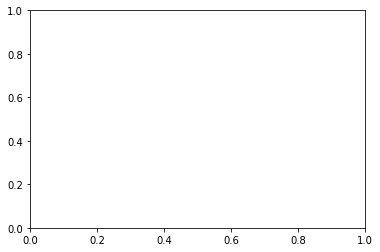

In [123]:
sns.distplot(np.array(averageCompressionLyricistWiseData)[:,0],np.array(averageCompressionLyricistWiseData)[:,1])

In [121]:
np.array(averageCompressionLyricistWiseData)[:,1]

array(['67.49256689791873', '58.144329896907216', '63.129209143171295',
       '60.497813227592246', '58.09776688716003', '64.75983045500973',
       '65.01324407915803', '67.74519716885743', '60.72061947412769',
       '55.18062723302898', '59.120569280343716', '52.15759849906191',
       '61.69934247335211', '60.93566489980328', '74.68839884947268',
       '65.20811099252936', '60.257271224868894', '67.19576719576719',
       '52.53623084768747', '63.212435233160626', '54.445211814182144',
       '56.74089231998848', '61.035200145926176', '60.55818641969936',
       '65.80366774541531', '57.451272714880936', '67.02619414483821',
       '69.54921803127874', '61.37488175372833', '64.51063829787233',
       '65.45718432510886', '65.23297491039426', '73.8544474393531',
       '58.36759605037551', '61.84210526315789', '48.260351372825994',
       '55.53110470446983', '58.18830709889096', '60.56910569105691',
       '64.29197868177833', '59.3786111007567', '57.278011133228084'],
      dtyp

In [147]:
allLyricists = []
lyricistsCompression = []
for x in averageCompressionLyricistWiseData:
    allLyricists.append(x[0])
    lyricistsCompression.append(x[1])
    
lyricistsAndCompressions = pd.DataFrame()
lyricistsAndCompressions["lyricist"] = allLyricists
lyricistsAndCompressions["compression"] = lyricistsCompression

In [153]:
lyricistsAndCompressions.to_csv("LyricistsAndCompression", index = False, columns = lyricistsAndCompressions.columns)

In [150]:
yearWiseCompressions = pd.DataFrame()

In [155]:
songs_Compressions = pd.DataFrame()
mySong = []
mySongCompression = []
for row in compressionList_Lyricist:
    mySong.append(row[1])
    mySongCompression.append(row[2])
songs_Compressions["song"] =  mySong
songs_Compressions["compression"] = mySongCompression
songs_Compressions.to_csv("SongsAndCompressions", index = False, columns = songs_Compressions.columns)  

In [157]:
pd.read_csv("SongsAndCompressions")
pd.read_csv("LyricistsAndCompression")

,lyricist,compression
0,"Mellow D, Badshah",67.492567
1,Sahib,58.144330
2,Saurabh Jain,63.129209
3,Puneet Sharma,60.497813
4,Kumaar,58.097767
5,Guru Randhawa,64.759830
6,Devshi Khanduri,65.013244
7,"DIVINE, Frenzzy, Saifan, Sammohit, D’Evil, Sle...",67.745197
8,DIVINE,60.720619
9,"DIVINE, Dave East",55.180627


In [162]:
yearWiseCompressionDataFrame =pd.DataFrame()
yearWiseCompressionDataFrame["year"] = yearly_compression[:10][:,0]
yearWiseCompressionDataFrame["compression"] = yearly_compression[:10][:,1]
yearWiseCompressionDataFrame.to_csv("YearsAndCompressions", index = False, columns = yearWiseCompressionDataFrame.columns)  


In [163]:
pd.read_csv("YearsAndCompressions")

,year,compression
0,2019.0,62.388075
1,2018.0,57.358522
2,2017.0,55.028357
3,2016.0,56.609024
4,2015.0,58.006773
5,2014.0,59.220432
6,2013.0,58.846922
7,2012.0,58.780027
8,2011.0,58.594150
9,2010.0,58.748470
